In [112]:
# importing packages for project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import norm
import seaborn as sns
import statsmodels.api as sm




#       PART ONE 
***You conduct an A/B test for your website by showing A to some of your users, and B to others.

ad clicks	total views
A	500	1000
B	550	1000
It looks like B is better than A...

Perform a hypothesis test using the two-proportion z-value test See the "pooled" version from the table here statistic at both the 5% and 1% signficance levels.

Begin by formulating and writing down your null hypothesis, then compute the Z value for this trial, and its associated p-value.

Note: the Z value you compute is assumed to be distributed according to the standard normal distribution (mean = 0, variance = 1). We'll consider the "1-sided" p-value which meaures the probability of a sample having a Z value that is more extreme in only one tail (to get the 2-sided value, you'd just multiply by 2).

What can you conclude?

Note, to help you understand your results, you might want to tweak the number of clicks for b to see how that changes your results. For example, what do you expect to happen to your p value if b is clicked 560 or 570 times? This is JUST for understanding the results, and shouldn't bias your decision one way or another!***

In [89]:
# two proportion z-test pooled for H0
# z= (p1-P2)/ sqrt(pHat(1-pHat)(1/n1 +1/n2))
# pHat = x1+x2/(n1+n2)

# NULL HYPOTHESIS:
# there is no difference between A and B
# H0 = pA = pB

# ALTERNATIVE HYPOTHESIS:
# B has a better click rate than A
# HA = pB > pA


def calculateZP(clicksA, viewsA, clicksB,viewsB):
   #calculate sample proportions
   p_A = clicksA/viewsA
   p_B = clicksB/viewsB

   p_pool = (clicksA+clicksB) / (viewsA + viewsB)

   standardError = np.sqrt(p_pool * (1-p_pool)*(1/viewsA+1/viewsB))
   #get z-value
   z_value = (p_B - p_A) / standardError
   #get p-value
   p_value = 1-norm.cdf(z_value)
   return z_value, p_value


z_value, p_value = calculateZP(clicksA=500, viewsA=1000, clicksB=550,viewsB=1000)
print(f"Z-value: {z_value}")
print(f"One-sided p-value: {p_value}")

print("what if B was clicked 600 times?")
z_value, p_value = calculateZP(clicksA=500, viewsA=1000, clicksB=600,viewsB=1000)
print(f"Z-value: {z_value}")
print(f"One-sided p-value: {p_value}")

print("what if B was clicked 200 times?")
z_value, p_value = calculateZP(clicksA=500, viewsA=1000, clicksB=200,viewsB=1000)
print(f"Z-value: {z_value}")
print(f"One-sided p-value: {p_value}")



Z-value: 2.238868314198227
One-sided p-value: 0.012582242850159187
what if B was clicked 600 times?
Z-value: 4.4946657497549465
One-sided p-value: 3.4839655363994027e-06
what if B was clicked 200 times?
Z-value: -14.064216928154863
One-sided p-value: 1.0


Based on my results, I can conclude that my z-value is 2.23 and my p value is 0.012. The z-value measures how many standard deviations the observed difference in proportions is away from the null hypothesis. Higher z values means greater difference between observed data and the null hypothesis. 

Since the p_value is below 0.05, I can reject the null hypothesis at the 5% significance level and say that the B logo had a significantly higher click to view rate than version A.

Since the p-value is not below 0.01, I cannot reject the null hypotheis at the 1% significance level. I cannot say that there is any difference between the two images in terms of their click to view ratio. 

#       PART TWO
For this problem, you will analyze SLC real estate data. The dataset contains multiple listing service (MLS) real estate transactions for houses sold in 2015-16 in zip code 84103 (SLC avenues neighborhod Google Map). We are primarily interested in regressing the SoldPrice on the house attributes (property size, house size, number of bedrooms, etc...).




# TASK 1
Use the pandas.read_csv() function to import the dataset. The data is contained in two files: realEstate1.csv and realEstate2.csv. After you import these files separately, concatenate them into one big dataframe. This pandas dataframe will be used for data exploration and linear regression.

In [67]:
file1 = pd.read_csv('realEstate1.csv')
file2 = pd.read_csv('realEstate2.csv')


# use concat to merge the data files
df = pd.concat([file1,file2], ignore_index=True)
# print the heads
# print(df.head())
# got 206 columns, so feeling good about this so far

#displaying help
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# display(df)


# TASK 2
Only keep houses with List Price between 200,000 and 1,000,000 dollars. This is an arbitrary choice and we realize that some of you are high rollers, but for our purposes we'll consider the others as outliers. 

Remove columns that you don't think contribute to the value of the house. This is a personal decision - what attributes of a house are important to you? You should at least keep the following variables since the questions below will use them: ['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'LstPrice', 'Patio', 'PkgSpacs', 'PropType', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']

Check the datatypes and convert any numbers that were read as strings to numerical values. (Hint: You can use str.replace() to work with strings.) If there are any categorical values you're interested in, then you should convert them to numerical values as we saw in the notes (the get_dummies function may help). In particular, convert 'TotSqf' to an integer and add a column titled Prop_Type_num that is 0 if i-th listing is a condo or townhouse, or 1 if i-th listing is a single family house

Remove the listings with erroneous 'Longitude' (one has Longitude = 0) and 'Taxes' values (at least two have unreasonably large values).

In [106]:
listPriceFilter_df = df[(df['LstPrice'] >= 200000) & (df['LstPrice'] <= 1000000)]

# print(listPriceFilter_df.head())

#making sure that the size decreased when i filtered it
print("original size", df.size)
print("new size", listPriceFilter_df.size)

# display(listPriceFilter_df)

relevantColumns = [
    'Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'LstPrice', 
    'Patio', 'PkgSpacs', 'PropType', 'SoldPrice', 'Taxes', 'TotBed', 
    'TotBth', 'TotSqf', 'YearBlt'
]

filtered_df = listPriceFilter_df[relevantColumns].copy()
# get rid of 'object' types --> turn into integer
# print(filtered_df.dtypes)
filtered_df['TotSqf'] = filtered_df["TotSqf"].str.replace(',', '').astype(int)

# convert 'PropType' to numerical and save in new column
filtered_df['PropType_num'] = filtered_df['PropType'].apply(lambda x: 0 if x in ['Condo', 'Townhouse'] else 1)

# remove listings with erroneous 'Longitude' and 'Taxes' values
filtered_df = filtered_df[filtered_df['Longitude'] != 0]
filtered_df = filtered_df[filtered_df['Taxes'] < 100000]

print("data types after conversion:\n",filtered_df.dtypes)



original size 71688
new size 54178
data types after conversion:
 Acres           float64
Deck              int64
GaragCap          int64
Latitude        float64
Longitude       float64
LstPrice          int64
Patio             int64
PkgSpacs          int64
PropType         object
SoldPrice         int64
Taxes             int64
TotBed          float64
TotBth          float64
TotSqf            int64
YearBlt           int64
PropType_num      int64
dtype: object


# TASK 3
Explore the dataset. Write a short description of the dataset describing the number of items, the number of variables and check to see if the values are reasonable.

Make a bar chart showing the breakdown of the different types of houses (single family, townhouse, condo).

Compute the correlation matrix and use a heat map to visualize the correlation coefficients.

Use a diverging color scale from -1 to +1 (see vmin and vmax parameters for pcolor
Show a legend (colorbar)
Make sure the proper labels are visible and readable (see xticks and the corresponding yticks.
Make a scatter plot matrix to visualize the correlations. For the plot, only use a subset of the columns: ['Acres', 'LstPrice', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']. Determine which columns have strong correlations.

Describing your findings.



<function matplotlib.pyplot.show(close=None, block=None)>

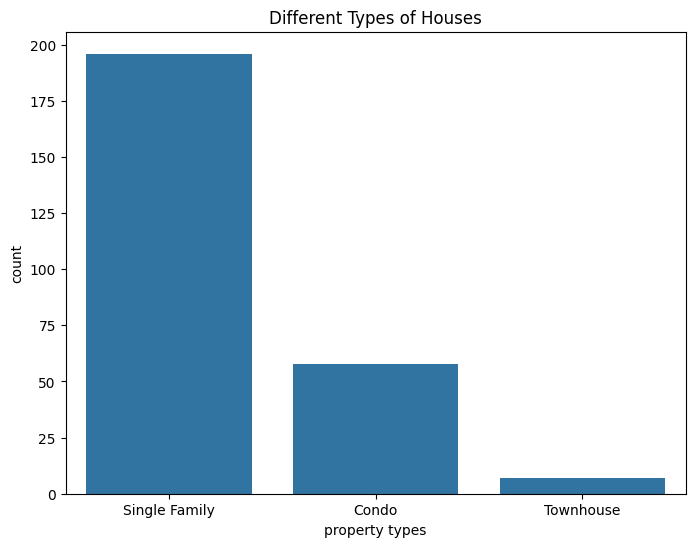

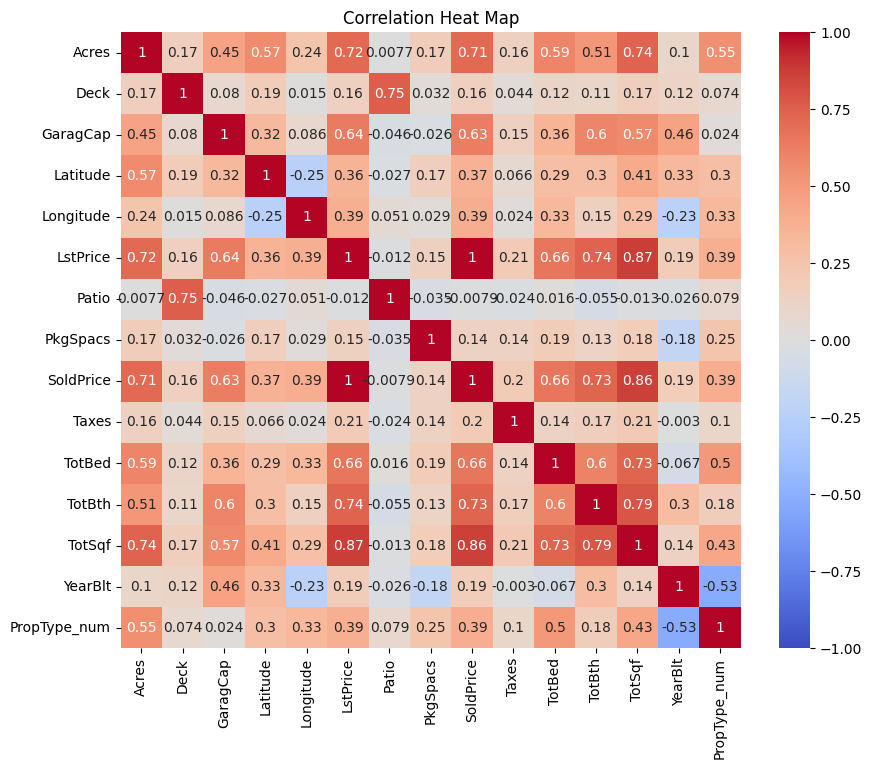

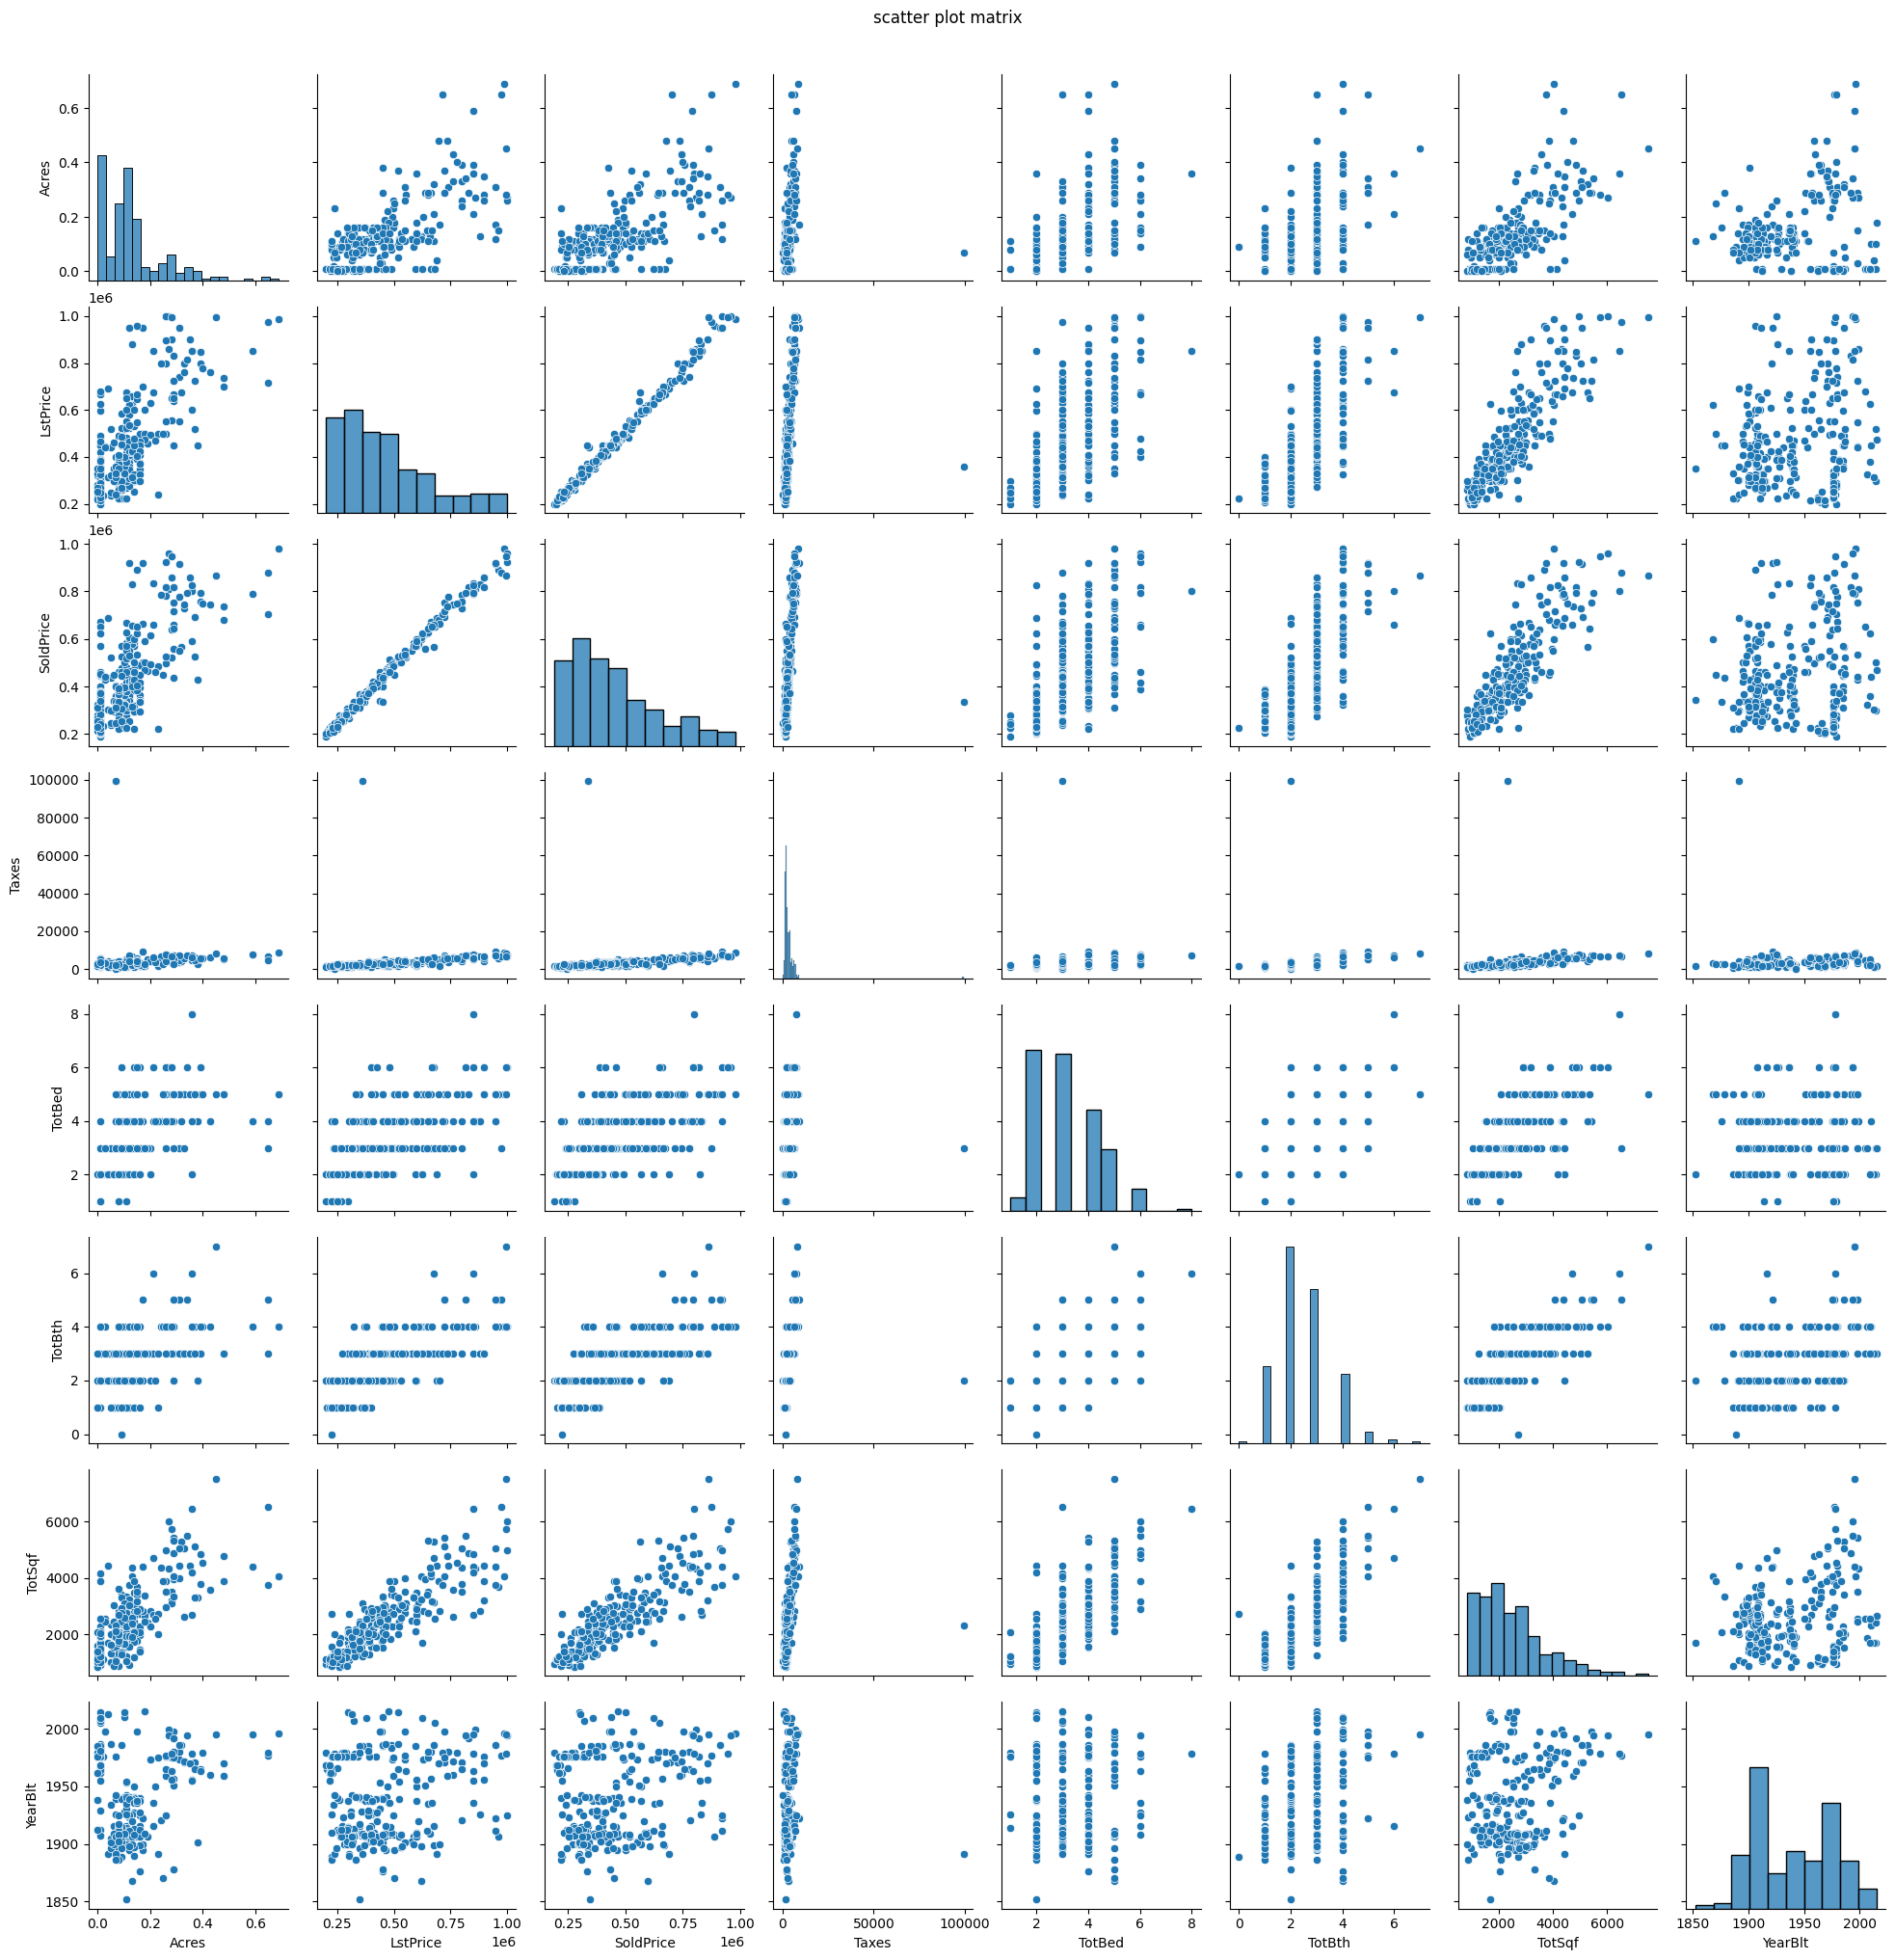

In [109]:
description = filtered_df.describe()
num_items = filtered_df.shape[0]
num_variables = filtered_df.shape[1]


# bar chart --------------
prop_type_counts = filtered_df['PropType'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=prop_type_counts.index, y=prop_type_counts.values)
plt.title("Different Types of Houses")
plt.xlabel("property types")
plt.ylabel("count")
plt.show

#take out 'PropType' column for graphing
filtered_df_no_PropType = filtered_df.drop(columns=['PropType'])

#correlation matrix and heat map ----------------
corr_matrix = filtered_df_no_PropType.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.title("Correlation Heat Map")
plt.show

# scatter plot -----------------------
scatterPlotColumns = [
    'Acres', 'LstPrice', 'SoldPrice', 'Taxes', 'TotBed', 
    'TotBth', 'TotSqf', 'YearBlt'
]
sns.pairplot(filtered_df[scatterPlotColumns])
plt.suptitle("scatter plot matrix", y =1.02)
plt.show

My findings:

There were a lot more single family homes than condos or townhomes in this data set. 


In the heat map, if something is really red then it means as one variable increases, so does the other. If a square is really blue it means as one goes up, the other goes down. If the hue of the color is faded, then there is a less strong relationship between the variables. There is a very high positive correlation between list price and sold price. The most negatively correlated variables are year built and prop type number. We assigned 0 to condo and townhouses, so there are more of those being built in larger(later) years. I think this makes sense with housing trends I have seen in salt lake and the limited space to build larger homes/listings. The square feet is also strongly associated with soldprice and list price. 

The scatter plot is showing us again how different variables correlate with each other. I think this graph is helpful to see correlations between continuous data (like taxes, listPrice, square feet, etc) but not as helpful to see the categorical data trends (like number of bathrooms, beds, etc) because the graph is choppy and harder to see the correlation.

# TASK 4
Two of the variables are the latitude and longitude of each listing. Salt Lake City is on this nice east-west, north south grid, so even a simple plot of lat and long makes sense. Create a scatterplot of these two variables. Use color to indicate the price of the house. How does the price depend on the house location?

Bonus: If you can, overlay the scatterplot on a map of the city. (This is challenging, and we didn't teach you how to do it, so you should do the other parts of the assignment first.)

What can you say about the relation between the location and the house price?

<function matplotlib.pyplot.show(close=None, block=None)>

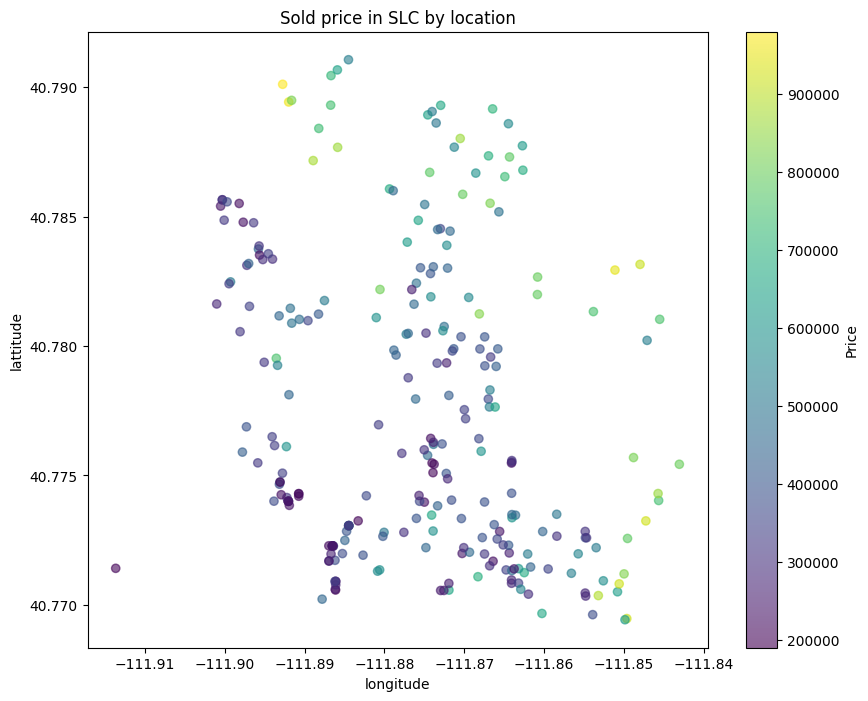

In [110]:
plt.figure(figsize=(10,8))

scatter = plt.scatter(x=filtered_df['Longitude'], y=filtered_df['Latitude'], c=filtered_df['SoldPrice'],cmap='viridis',alpha=0.6)

plt.colorbar(scatter, label='Price')
plt.title("Sold price in SLC by location")
plt.xlabel("longitude")
plt.ylabel("lattitude")
plt.show

It looks like homes at a lower longitude and lattitude are selling for lower prices. This would mean south west area of salt lake sells for less than other areas. The most northern part sells for higher amounts of money. I assume this overlaps with parts of downtown and the avenues, a high demand area. The eastern bench also sells for larger amounts of money. These homes are probably along the ridge of mountains, which have great views and cost more.

# TASK 5
Use the 'ols' function from the statsmodels package to regress the Sold price on some of the other variables. Your model should be of the form Sold Price = beta_0 + beta_1 * x, where x is one of the other variables.

You'll find that the best predictor of sold price is the list price. Report the R-squared value for this model (SoldPrice ~ LstPrice) and give an interpretation for its meaning. Also give an interpretation of beta_1 for this model. Make a plot of list price vs. sold price and overlay the prediction coming from your regression model.

R-squared:  0.9902026237979631
Coefficient(beta1) for the list prices 0.944280159377647


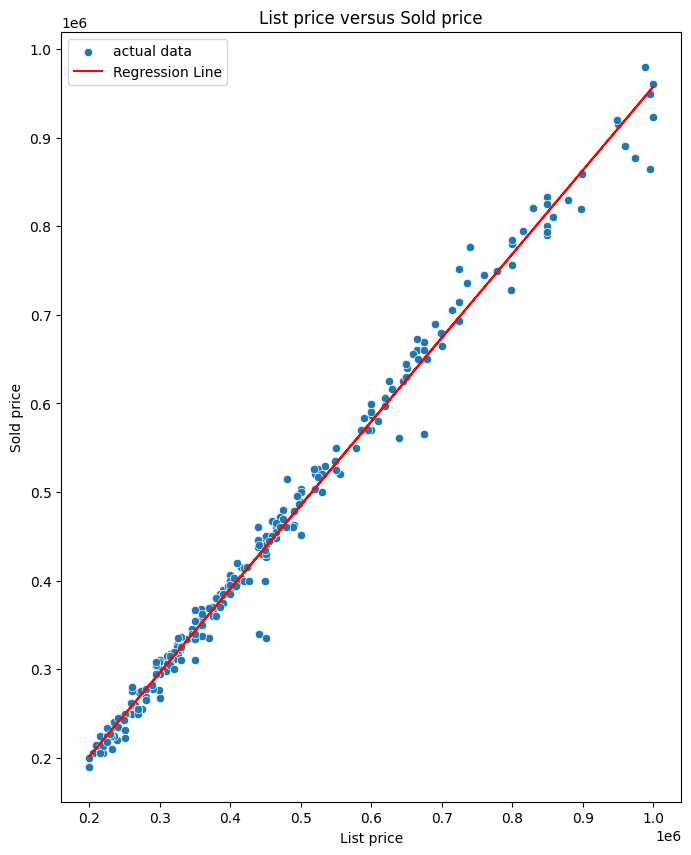

In [115]:
x= filtered_df['LstPrice']
x= sm.add_constant(x)

y=filtered_df['SoldPrice']
model = sm.OLS(y,x).fit()

predictions = model.predict(x)

rSquared = model.rsquared
print(f'R-squared:  {rSquared}')

beta1 = model.params['LstPrice']
print(f"Coefficient(beta1) for the list prices {beta1}")


#make the plot
plt.figure(figsize=(8,10))
sns.scatterplot(x='LstPrice', y='SoldPrice', data=filtered_df, label = "actual data")
plt.plot(filtered_df['LstPrice'], predictions,color='red',label="Regression Line")
plt.title('List price versus Sold price')
plt.xlabel("List price")
plt.ylabel("Sold price")
plt.legend()
plt.show()


 # TASK 6
 Develop a multilinear regression model for house prices in this neighborhood. We could use this to come up with a list price for houses coming on the market, so do not include the list price in your model and, for now, ignore the categorical variable Prop_Type. Your model should be of the form:

Sold Price = beta_0 + beta_1 * x_1 + beta_2 * x_2 + ... +  beta_n * x_n 

                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     97.07
Date:                Thu, 30 May 2024   Prob (F-statistic):           1.97e-83
Time:                        10:22:43   Log-Likelihood:                -3324.7
No. Observations:                 261   AIC:                             6673.
Df Residuals:                     249   BIC:                             6716.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.513e+08   5.55e+07      4.528      0.0

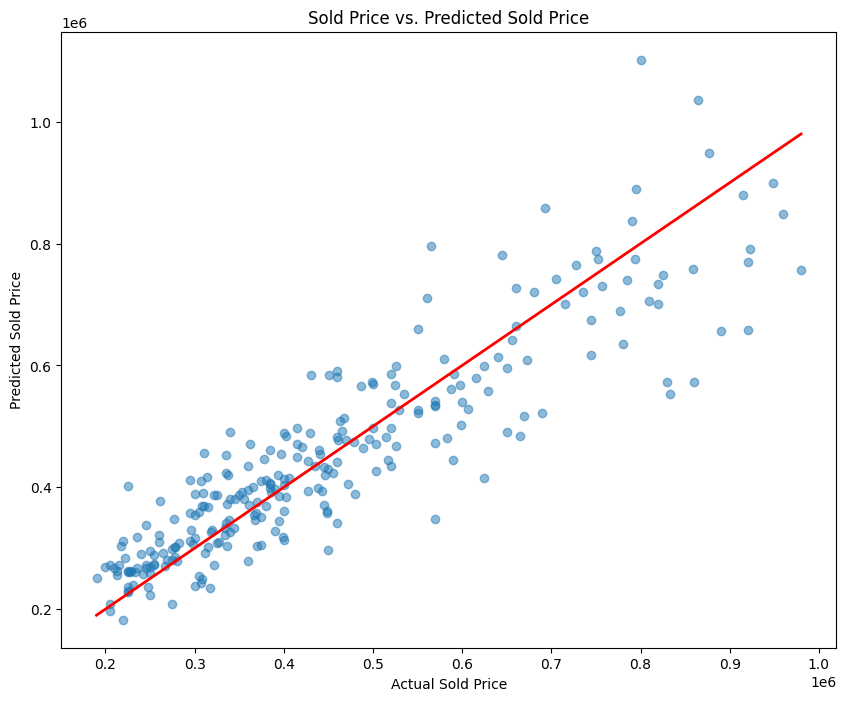

In [130]:
features =['TotSqf', 'GaragCap', 'Latitude', 'Longitude', 'Taxes', 'TotBed', 
    'TotBth', 'Acres', 'YearBlt', 'Deck', 'Patio']

x=filtered_df[features]
y=filtered_df['SoldPrice']

x=sm.add_constant(x)

model = sm.OLS(y,x).fit()
predictions = model.predict(x)
print(model.summary())

#now plot
plt.figure(figsize=(10, 8))
plt.scatter(filtered_df['SoldPrice'], predictions, alpha=0.5)
plt.plot([filtered_df['SoldPrice'].min(), filtered_df['SoldPrice'].max()], 
         [filtered_df['SoldPrice'].min(), filtered_df['SoldPrice'].max()], 
         color='red', lw=2)
plt.title('Sold Price vs. Predicted Sold Price')
plt.xlabel('Actual Sold Price')
plt.ylabel('Predicted Sold Price')
plt.show()


SPECIFIC QUESTIONS -------------------------------------

Where x_i are predictive variables. Which variables are the best predictors for the Sold Price?
Variables that were the best predictors (p value below 0.05):
Total square feet (p=0.0)
garage cap (p=0.00)
longitude (p=0.00)
total bathroom (p=0.022)
acres (p=0.005)

Often the price per square foot for a house is advertised. Is this what the coefficient for TotSqf is measuring? Provide an interpretation for the coefficient for TotSqf.
The coefficient for TotSqf is 72.6881. This means that each additional square feet added adds a value of 72.69$ to the home.

Estimate the value that each Garage space adds to a house.
I would estimate that the garage adds 33,800$ to the home based on my model. This is because the garageCap coefficient is 33,800.

Does latitude or longitude have an impact on house price? Explain.
The latitude has a p-value of 0.399 which is not statistically significant. This means it doesn't impact house price. The longitude has a p-value of 0.000 which means that it strongly correlates/impacts sold price. 

If we wanted to start a 'house flipping' company, we'd have to be able to do a better job of predicting the sold price than the list price does. How does your model compare?
The model has an r-squared of 0.811, indicating that it explains 81% of the variability in sold price. The list model from part five has an r-value of 0.99 which is much better at predicting sold price, but I still feel like our model is pretty good at predicting this.

# TASK 7
Above, we considered houses, townhouses, and condos together, but here we'll distinguish between them. Consider the two regression models:

SoldPrice = beta_0 + beta_1 * Prop_Type_num

and

SoldPrice = beta_0  + beta_1 * Prop_Type_num + beta_2 * TotSqf

From the first model, it would appear that Property type is significant in predicting the sold price. On the other hand, the second model indicates that when you take into account total square footage, property type is no longer predictive. Explain this. (Hint: there is a confounder lurking here.) Make a scatterplot of TotSqf vs. SoldPrice where the house types are colored differently to illustrate your explanation.

                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     36.34
Date:                Thu, 30 May 2024   Prob (F-statistic):           5.69e-09
Time:                        10:45:02   Log-Likelihood:                -3524.9
No. Observations:                 261   AIC:                             7054.
Df Residuals:                     259   BIC:                             7061.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.338e+05   2.22e+04     15.009   

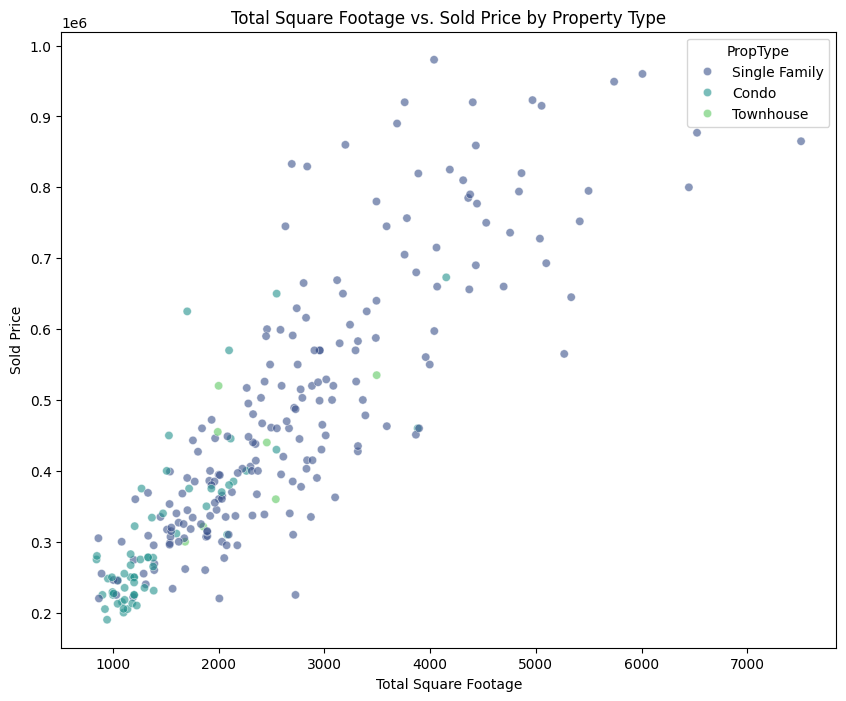

In [134]:
filtered_df['PropType_num'] = filtered_df['PropType'].astype('category').cat.codes

# fit the first model
model1 = sm.OLS(filtered_df['SoldPrice'], sm.add_constant(filtered_df['PropType_num'])).fit()
print(model1.summary())

# fit the second model
X2 = filtered_df[['PropType_num', 'TotSqf']]
X2 = sm.add_constant(X2)
model2 = sm.OLS(filtered_df['SoldPrice'], X2).fit()
print(model2.summary())

# scatterplot of TotSqf vs. SoldPrice colored by Prop_Type
plt.figure(figsize=(10, 8))
sns.scatterplot(data=filtered_df, x='TotSqf', y='SoldPrice', hue='PropType', palette='viridis', alpha=0.6)
plt.title('Total Square Footage vs. Sold Price by Property Type')
plt.xlabel('Total Square Footage')
plt.ylabel('Sold Price')
plt.show()